In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [7]:
data = pd.read_csv("train.csv")
data.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,B,B,B,C,B,B,A,E,C,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
1,2,B,B,A,A,B,D,A,F,A,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
2,3,A,A,A,C,B,D,A,D,A,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
3,4,B,B,A,C,B,D,A,E,C,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
4,6,A,A,A,C,B,D,A,E,A,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


In [3]:
data.describe()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,250018.576947,0.527335,0.460926,0.490498,0.496689,0.491654,0.510526,0.467476,0.537119,0.498456,0.474872,0.474492,0.473216,0.494561,0.508273,8.241979
std,144450.150010,0.230599,0.214003,0.253346,0.219199,0.240074,0.228232,0.210331,0.218140,0.239920,0.218007,0.255949,0.222022,0.247292,0.222950,0.746555
min,1.000000,-0.118039,-0.069309,-0.056104,0.130676,0.255908,0.045915,-0.224689,0.203763,-0.260275,0.117896,0.048732,0.052608,-0.074208,0.151050,0.140329
25%,124772.500000,0.405965,0.310494,0.300604,0.329783,0.284188,0.354141,0.342873,0.355825,0.332486,0.306874,0.276017,0.308151,0.289074,0.300669,7.742071
50%,250002.500000,0.497053,0.427903,0.502462,0.465026,0.390470,0.488865,0.429383,0.504661,0.439151,0.434620,0.459975,0.433812,0.422887,0.472400,8.191373
75%,375226.500000,0.668060,0.615113,0.647512,0.664451,0.696599,0.669625,0.573383,0.703441,0.606056,0.614333,0.691579,0.642057,0.714502,0.758447,8.728634
max,499999.000000,1.058443,0.887253,1.034704,1.039560,1.055424,1.067649,1.111552,1.032837,1.040229,0.982922,1.055960,1.071444,0.975035,0.905992,10.411992


In [29]:
data.columns

Index(['id', 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5',
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'target'],
      dtype='object')

<AxesSubplot:>

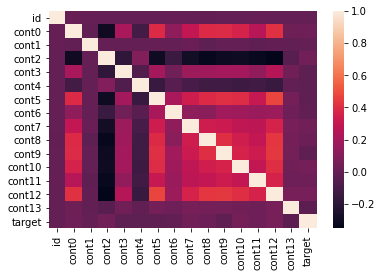

In [4]:
sns.heatmap(data.corr()) #correlation matrix

In [5]:
#null values
data.columns[data.isnull().sum() != 0]

Index([], dtype='object')

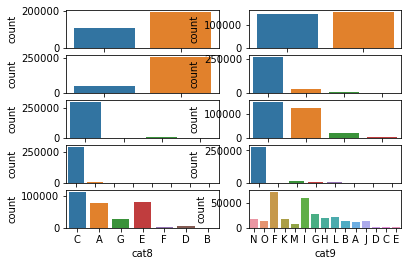

<Figure size 720x288 with 0 Axes>

In [38]:
fig, ax = plt.subplots(5,2)
plt.figure(figsize=(10, 4))
for i in range(10):
    sns.countplot(data['cat'+str(i)], ax=ax[i//2][i%2])
fig.show()

In [42]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)
object_cols

['cat0',
 'cat1',
 'cat2',
 'cat3',
 'cat4',
 'cat5',
 'cat6',
 'cat7',
 'cat8',
 'cat9']

In [44]:
data.columns[data.columns != 'target']

Index(['id', 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5',
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13'],
      dtype='object')

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[data.columns[data.columns != 'target']], data['target'], test_size=0.30, random_state=0)

In [60]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown='error', sparse=False, drop='first')

OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_train.index = X_train.index

num_X_train = X_train.drop(object_cols, axis=1)
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)

In [62]:
OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[object_cols]))
OH_cols_test.index = X_test.index
num_X_test = X_test.drop(object_cols, axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

In [67]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(OH_X_train, y_train)
y_pred = model.predict(OH_X_test)

In [73]:
from sklearn.metrics import mean_squared_error, explained_variance_score

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", explained_variance_score(y_test, y_pred))

MSE: 0.5462729847143016
R2 Score: 0.02097018977536591


In [107]:
test = pd.read_csv('test.csv')

OH_cols_test = pd.DataFrame(OH_encoder.transform(test[object_cols]))
OH_cols_test.index = test.index
num_X_test = test.drop(object_cols, axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

In [108]:
y_pred = model.predict(OH_X_test)

In [109]:
y_pred.size

200000

In [110]:
a = np.vstack((np.array(OH_X_test['id'], dtype=np.int), y_pred)).T
a

array([[0.00000000e+00, 8.04010287e+00],
       [5.00000000e+00, 8.31603146e+00],
       [1.50000000e+01, 8.33527779e+00],
       ...,
       [4.99991000e+05, 8.24894061e+00],
       [4.99994000e+05, 8.22662560e+00],
       [4.99995000e+05, 8.21816105e+00]])

In [111]:
df = pd.DataFrame(a, columns=['id','target'])

In [112]:
df['id'] = df['id'].astype('int')

In [115]:
df.describe()

,id,target
count,200000.000000,200000.000000
mean,249970.884580,8.242617
std,144169.245904,0.113316
min,0.000000,7.754829
25%,125316.750000,8.165996
50%,249997.000000,8.241491
75%,374649.750000,8.317728
max,499995.000000,8.793705


In [116]:
df.to_csv('submission0.csv', index=False)